In [2]:
import numpy as np
import matplotlib.pyplot as plt
def g(x,y):
    return np.sin(x+y)+np.cos(x+2*y)
def dg(x,y):
    return np.array([np.cos(x+y)-np.sin(x+2*y),np.cos(x+y)-2*np.sin(x+2*y)])

transM=np.array([[2,-1],[-1,1]])

In [15]:
xmin=np.array([np.pi/2,np.pi])
transM@xmin

array([0.        , 1.57079633])

In [3]:
def gradiant_descent(x,y,ap=0.01,tol=1e-8,max_iter=10000):
    X=np.array([x,y],dtype=np.float64)
    his=[]
    convenged=0
    for i in range(max_iter):
        dX=dg(*X)
        X-=ap*dX+np.random.normal(loc=0.0, scale=tol)
        his.append(X.copy())
        if np.linalg.norm(dX)<tol:
            break
    else:
        convenged=1
    if convenged:
        print(f"gradiant_descent did not convenged after {max_iter} iterations")
    return X,np.array(his)

In [4]:
Xmin,his=gradiant_descent(0,0)


gradiant_descent did not convenged after 10000 iterations


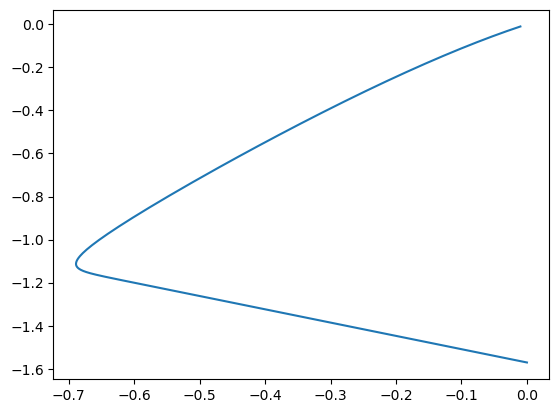

In [13]:
plt.plot(his[:,0],his[:,1])

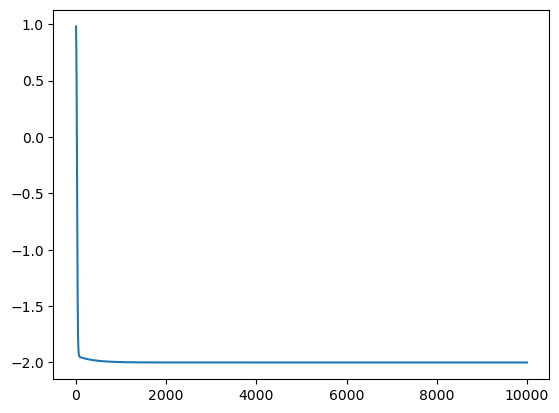

In [6]:
plt.plot([g(his[i,0],his[i,1]) for i in range(len(his))])

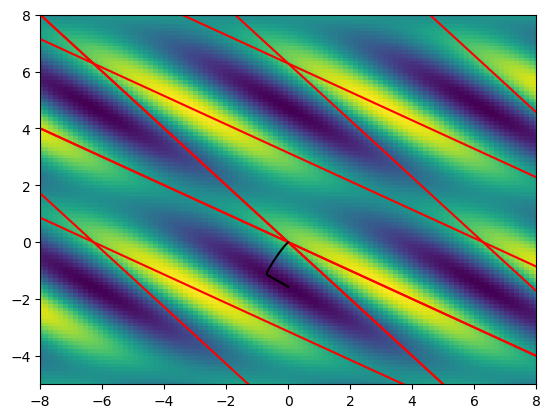

In [10]:
x=np.linspace(-8,8,100)
y=np.linspace(-5,8,100)
X,Y=np.meshgrid(x,y)
Z=g(X,Y)
heatmap = plt.pcolormesh(X, Y, Z, shading='auto', cmap='viridis')
plt.plot(x,-x,c="r")
for n in range(4):
    plt.plot(x,(n-1)*2*np.pi-x,c="r")
    plt.plot(x,(n-1)*np.pi-x/2,c="r")
plt.plot(x,-x/2,c="r")
plt.xlim(-8,8)
plt.ylim(-5,8)
plt.plot(his[:,0],his[:,1],c="k");